In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns


In [69]:
data=pd.read_csv(r"C:\Users\USER\Desktop\iris_Data.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [70]:
data.shape

(150, 5)

In [71]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [75]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [76]:
data.duplicated().sum()

3

In [77]:
data=data.drop_duplicates()

In [78]:
data.size

735

In [79]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


VISUALIZATION

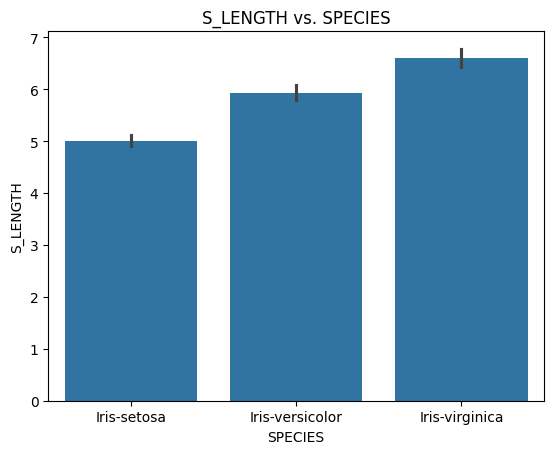

In [80]:
sns.barplot(x='species', y='sepal_length', data=data)
plt.xlabel('SPECIES')
plt.ylabel('S_LENGTH')
plt.title('S_LENGTH vs. SPECIES')
plt.show()

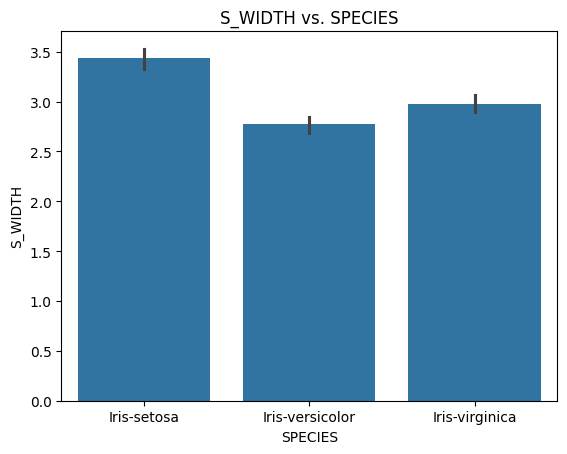

In [81]:
sns.barplot(x='species', y='sepal_width', data=data)
plt.xlabel('SPECIES')
plt.ylabel('S_WIDTH')
plt.title('S_WIDTH vs. SPECIES')
plt.show()

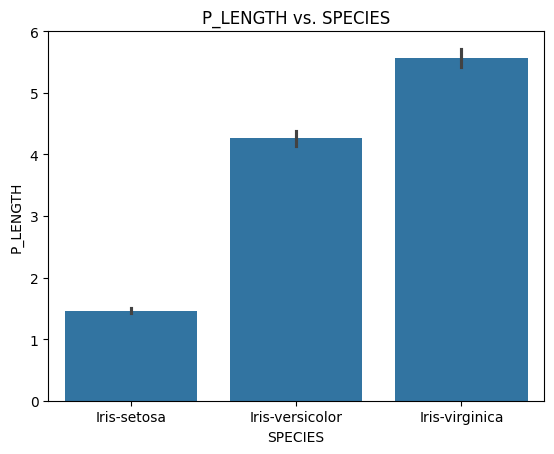

In [82]:
sns.barplot(x='species', y='petal_length', data=data)
plt.xlabel('SPECIES')
plt.ylabel('P_LENGTH')
plt.title('P_LENGTH vs. SPECIES')
plt.show()

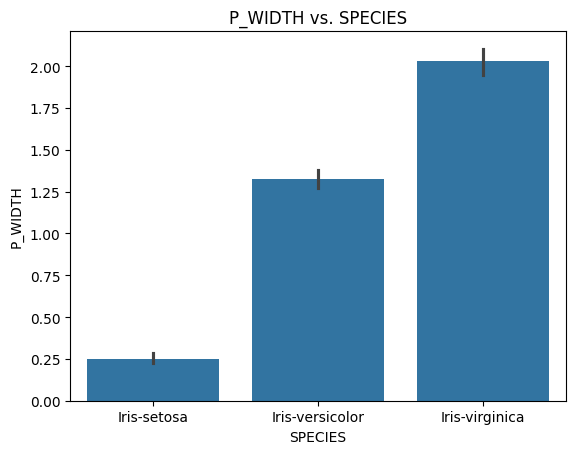

In [83]:
sns.barplot(x='species', y='petal_width', data=data)
plt.xlabel('SPECIES')
plt.ylabel('P_WIDTH')
plt.title('P_WIDTH vs. SPECIES')
plt.show()

CHANGING DATA FROM CATEGORICAL TO NUMERICAL

In [84]:
data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [85]:
data['species']=data.species.map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [86]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [87]:
x=data.drop(['species'],axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [88]:
y=data[['species']]
y.head()

,species
0,1
1,1
2,1
3,1
4,1


SPLITTING DATA INTO TRAINING AND TESTING

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
x_train.shape

(117, 4)

In [91]:
x_test.shape

(30, 4)

TRAINING MODEL

In [92]:
from sklearn.tree import DecisionTreeClassifier
Dtc=DecisionTreeClassifier()
from sklearn.metrics import r2_score

In [93]:
Dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
y_pred=Dtc.predict(x_test)

In [95]:
score=r2_score(y_test,y_pred)
score

0.9496644295302014

In [96]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


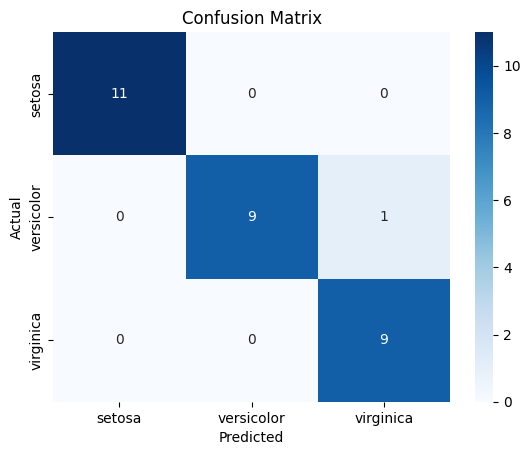

In [99]:

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
target_names = iris.target_names
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


MODEL SAVING

In [ ]:
import joblib
joblib.dump(Dtc,r'classi\iris.pkl')
classi = joblib.load(r'classi\iris.pkl')

MODEL TESTING

In [ ]:
result=classi.predict([[1,0,1,9]])
result

array([1], dtype=int64)